<a href="https://colab.research.google.com/github/chengchun100/start2/blob/main/2_danmu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/nanshan1115/raw/main/danmu.txt"
req.urlretrieve(url, "damu.txt")

('damu.txt', <http.client.HTTPMessage at 0x7e57c5278310>)

In [ ]:
#要把檔案中的字串改為list和字典型態，所以配合json
import json
f = open("damu.txt", "r", encoding="utf-8")
danmus = json.load(f)
f.close()
danmus

In [ ]:
#pd.DataFrame型態:表格
import pandas as pd
df = pd.json_normalize(danmus)
df

<Axes: xlabel='time', ylabel='Count'>

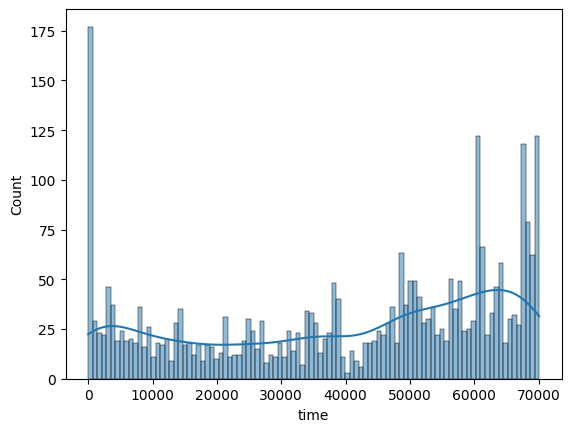

In [9]:
# matplotlib: 基礎的畫圖函式庫
# seaborn: 進階畫圖函式庫
import matplotlib.pyplot as plt
import seaborn as sns
#bins是間隔的意思，kde是核修勻，可以看連續時間分布下實際上的熱度
sns.histplot(x=df["time"], bins=100, kde=True)